In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [103]:
image = cv2.imread("ModulePictures/20UPGM23211132_PPPV2_43_AfterBonding_NOK.jpg")
image.shape

(5504, 6880, 3)

In [ ]:
## Trouver la colonne verte

def find_column_left(image):
    colonnes=[image[:,i,:] for i in range(image.shape[1])]
    i=0
    bool=False
    while not bool and i<len(colonnes):
        col=colonnes[i]
        for pix in col:
            if (pix[1]>50) and (pix[0]<30) and (pix[2]<30):
                bool=True
        if not bool:
            i+=1
    return i, colonnes[i]

(948,
 array([[135, 142, 135],
        [140, 146, 141],
        [142, 150, 143],
        ...,
        [106, 103,  99],
        [130, 129, 125],
        [146, 142, 141]], shape=(5504, 3), dtype=uint8))

In [ ]:
# Compte le nombre de fils sur la moitié gauche du module

def count(image, level = 0.8) :
    column_left = find_column_left(image)[0]
    state = False
    counter = 0
    for i in range(image.shape[0]) :
        if (image[i,column_left-5:column_left+5].sum()/(255*10*3)) > level :
            if not(state) :
                counter+=1
                state = True
        else :
            state = False
    return (counter)

count(image)


349

19


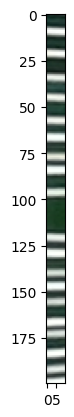

In [133]:
test_low = 1000
test_high = 1200

print(count(image[test_low:test_high]))
column = find_colonne(image[test_low:test_high])[0]
plt.imshow(image[test_low:test_high, column-5:column+5])